In [1]:
pip install praw


Note: you may need to restart the kernel to use updated packages.


In [4]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="Sd2tPL7OsSYPe29hMu_cOA",
    client_secret="qCTlL8zyiMNWN6RQx5i3cA1TWQ7l9A",
    user_agent=user_agent
)

In [5]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

# bitcoin subreddit channel

In [6]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
92
0.95
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


In [8]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
1bg5lv0
BitcoinFan7
1710594154.0
96
0.95
https://www.reddit.com/r/Bitcoin/comments/1bg5lv0/bitcoin_newcomers_faq_please_read/
0


# Getting total comments in reddit

In [9]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

645


In [10]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()


,0
0,"I want to start investing in bitcoin, is it st..."
1,When did the “halvening” change to the “halving”?
2,Welcome to Epoch V
3,Team Slow and Steady (article by AJ Towns)
4,Happy ⛏ Halving! 🥳🥂 🌙 #BitcoinHalving2024 🎇


In [15]:

bitcoin_df.head()


,0
0,"I want to start investing in bitcoin, is it st..."
1,When did the “halvening” change to the “halving”?
2,Welcome to Epoch V
3,Team Slow and Steady (article by AJ Towns)
4,Happy ⛏ Halving! 🥳🥂 🌙 #BitcoinHalving2024 🎇


In [16]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [17]:
bitcoin_df.columns = ['Titles']

In [18]:
bitcoin_df.head()

,Titles
0,"I want to start investing in bitcoin, is it st..."
1,When did the “halvening” change to the “halving”?
2,Welcome to Epoch V
3,Team Slow and Steady (article by AJ Towns)
4,Happy ⛏ Halving! 🥳🥂 🌙 #BitcoinHalving2024 🎇


In [19]:
bitcoin_df.Titles.duplicated().sum() 

0

In [20]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()


,Titles
0,"I want to start investing in bitcoin, is it st..."
1,When did the “halvening” change to the “halving”?
2,Welcome to Epoch V
3,Team Slow and Steady (article by AJ Towns)
4,Happy ⛏ Halving! 🥳🥂 🌙 BitcoinHalving2024 🎇


In [21]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,"I want to start investing in bitcoin, is it st..."
1,When did the “halvening” change to the “halving”?
2,Welcome to Epoch V
3,Team Slow and Steady (article by AJ Towns)
4,Happy Halving! BitcoinHalving2024


In [24]:
!pip install textblob

     -------------------------------------- 626.3/626.3 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [25]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [26]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,"I want to start investing in bitcoin, is it st...",0.375,0.333333
1,When did the “halvening” change to the “halving”?,0.000,0.000000
2,Welcome to Epoch V,0.900,0.800000
3,Team Slow and Steady (article by AJ Towns),0.450,-0.066667
4,Happy Halving! BitcoinHalving2024,1.000,1.000000


In [27]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"I want to start investing in bitcoin, is it st...",0.375000,0.333333,Positive
1,When did the “halvening” change to the “halving”?,0.000000,0.000000,Neutral
2,Welcome to Epoch V,0.900000,0.800000,Positive
3,Team Slow and Steady (article by AJ Towns),0.450000,-0.066667,Negative
4,Happy Halving! BitcoinHalving2024,1.000000,1.000000,Positive
5,"Lovely, innit?All 56 blocks from halving",0.750000,0.500000,Positive
6,Setting Up Multisig - Process Check,0.000000,0.000000,Neutral
7,Bitcoin node,0.000000,0.000000,Neutral
8,Is this a concern?,0.000000,0.000000,Neutral
9,Bitcoin,0.000000,0.000000,Neutral


# Data Visualization

In [29]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

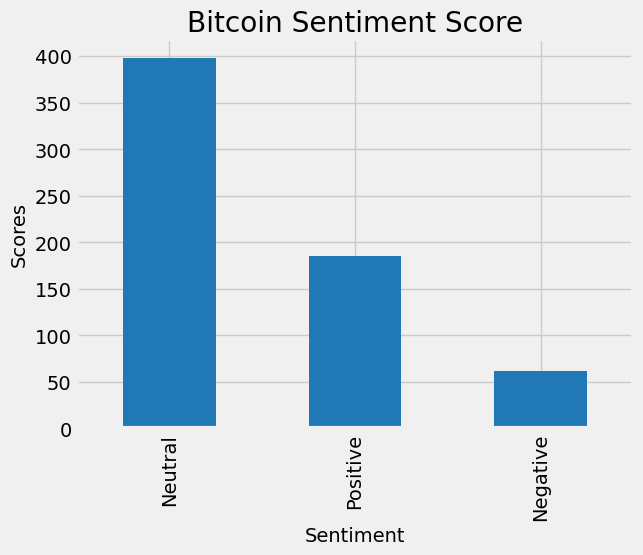

In [30]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()


# Word Cloud

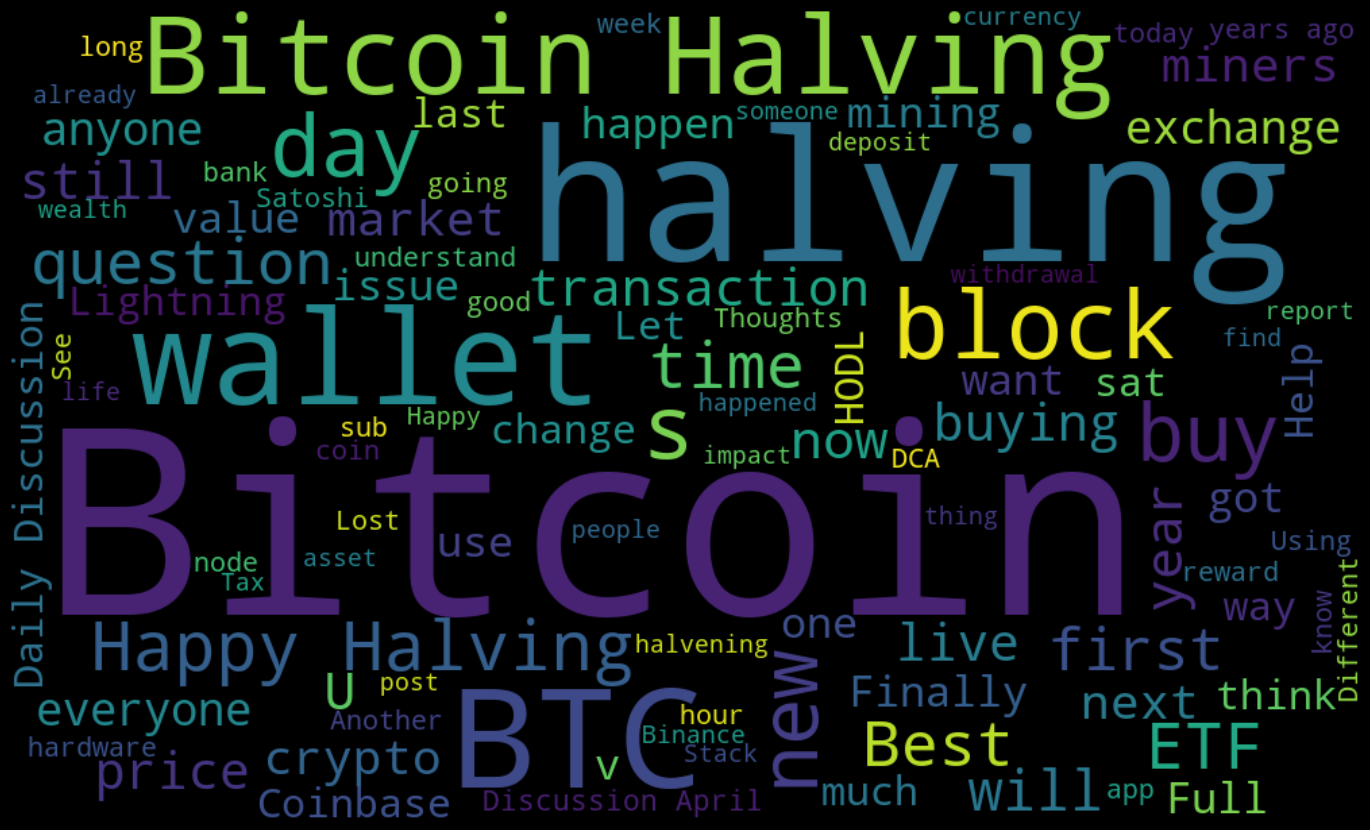

In [31]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");
